In [1]:
import pandas as pd
data_iris = pd.read_csv('iris_partial.csv',index_col=0)

In [2]:
data_iris.shape

(100, 3)

In [3]:
data_iris.sample(5)

,petal_l,petal_w,classes
28,1.4,0.2,0
45,1.4,0.3,0
9,1.5,0.1,0
73,4.7,1.2,1
55,4.5,1.3,1


In [4]:
data_iris.describe()

,petal_l,petal_w,classes
count,100.000000,100.000000,100.000000
mean,2.862000,0.785000,0.500000
std,1.448565,0.566288,0.502519
min,1.000000,0.100000,0.000000
25%,1.500000,0.200000,0.000000
50%,2.450000,0.800000,0.500000
75%,4.325000,1.300000,1.000000
max,5.100000,1.800000,1.000000


In [5]:
data_iris.isnull().sum()

petal_l    0
petal_w    0
classes    0
dtype: int64

In [8]:
import matplotlib.pyplot as plt 
data_iris.hist(figsize=(8,6)) 
plt.show()

<Figure size 800x600 with 4 Axes>

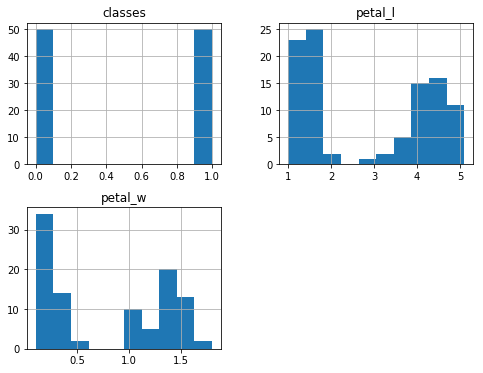

In [9]:
import matplotlib.pyplot as plt 
data_iris.hist(figsize=(8,6)) 
plt.show()

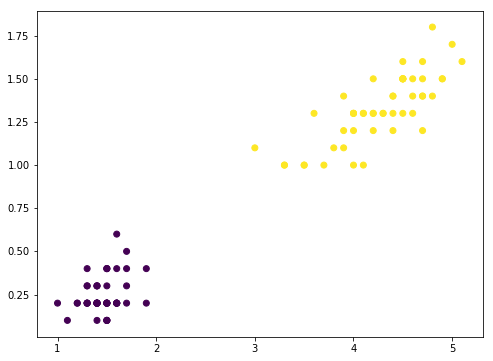

In [10]:
plt.figure(figsize=(8,6)) 
plt.scatter(x=data_iris['petal_l'], y=data_iris['petal_w'],c=data_iris['classes']) 
plt.show()

In [11]:
X = data_iris.iloc[:,:-1]
y = data_iris.iloc[:,-1]

In [12]:
from sklearn.model_selection import train_test_split 
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(X_tr,y_tr)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_pred = model.predict(X_ts) 
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [16]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_ts,y_pred)


array([[ 7,  0],
       [ 0, 13]])

In [17]:
from sklearn.metrics import classification_report 
print(classification_report(y_ts,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy') 
scores.mean()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

1.0

In [21]:
import pandas as pd
df = pd.read_csv('creditcard.csv')

In [22]:
df.shape

(284807, 31)

In [23]:
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
24578,33286.0,1.099998,-0.489555,0.970180,0.237352,-1.041075,0.110212,-0.776944,0.323208,0.834319,...,0.121188,0.473372,-0.029141,0.293131,0.172413,1.154336,-0.042596,-0.002936,22.52,0
102185,68081.0,1.261788,0.843868,-0.058721,2.356522,0.576556,-0.526298,0.661175,-0.338122,-1.248744,...,-0.029330,-0.031803,-0.185996,-0.074635,0.846528,0.094458,-0.030846,0.008531,4.92,0
24114,33076.0,-0.218324,-2.643621,0.373971,0.746007,-1.456970,1.139803,-0.052698,0.342859,0.870830,...,0.274191,-0.467230,-0.454847,-0.197377,-0.302137,0.883068,-0.132067,0.113535,677.60,0
132566,80032.0,-0.938909,1.428544,0.915143,-0.250584,0.103161,-0.512608,0.538666,0.106334,-0.105477,...,-0.284185,-0.725250,-0.041636,-0.075047,-0.073240,0.073005,0.312761,0.211559,5.99,0
74240,55482.0,-2.393852,1.350678,0.554859,-0.338185,0.514458,-0.272017,0.266420,-1.974777,0.834908,...,1.171253,-0.479020,0.465626,-0.459358,0.068726,0.286031,0.416593,0.070524,3.59,0


In [24]:
df.isnull().sum().sum()

0

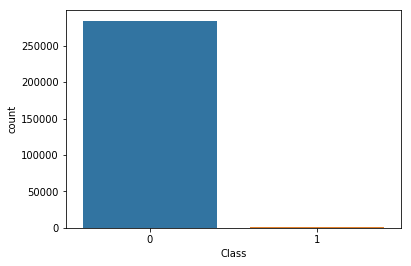

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.countplot(x='Class', data=df) 
plt.show()

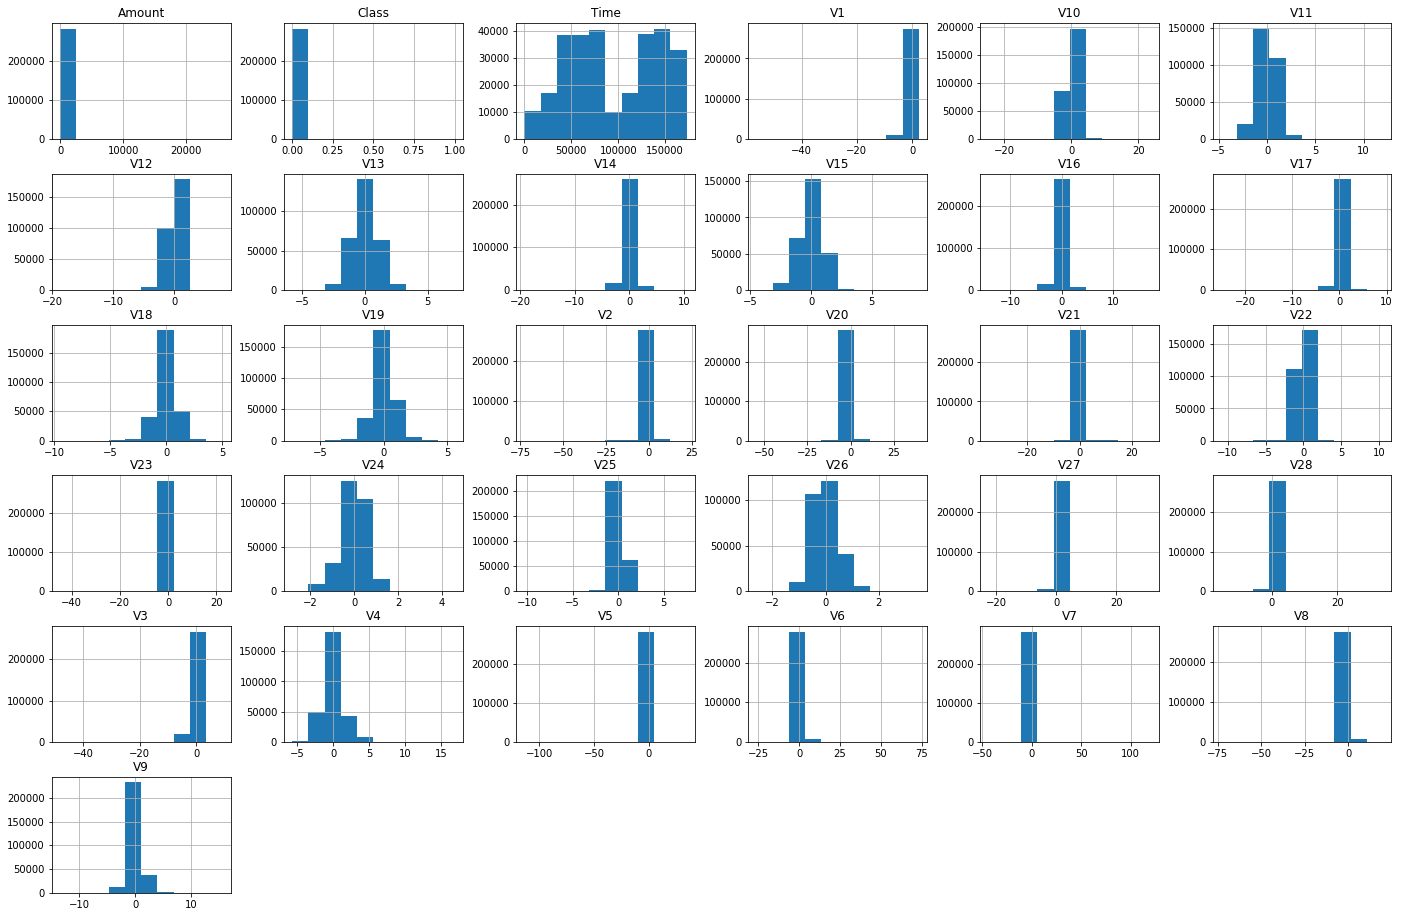

In [26]:
df.hist(figsize=(24,16)) 
plt.show()

In [27]:
from sklearn.preprocessing import StandardScaler 
df['normal_amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount','Time'], axis=1) 
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'normal_amount'],
      dtype='object')

In [28]:
X = df.loc[:,df.columns != 'Class']
 
y = df.loc[:,df.columns == 'Class']

In [29]:
from sklearn.model_selection import train_test_split 
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.2) 
X_tr .shape,X_ts.shape

((227845, 29), (56962, 29))

In [30]:
from sklearn.linear_model import LogisticRegression 
model_original = LogisticRegression() 
model_original.fit(X_tr,y_tr.values.ravel())

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
model_rs = LogisticRegression(class_weight='balanced') 
model_rs.fit(X_tr,y_tr.values.ravel())

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [33]:
model_roc = LogisticRegression() 
model_roc.fit(X_tr,y_tr.values.ravel())

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
from sklearn.metrics import roc_curve 
import numpy as np
preds = model_roc.predict_proba(X_ts)[:,1] 
fpr, tpr, thresh = roc_curve(y_ts, preds)
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

In [36]:
idx = np.argmax(tpr-fpr)
Thresh = thresh[idx]

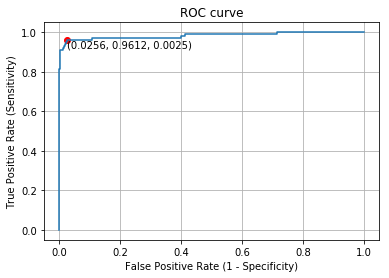

In [39]:
plt.plot(fpr ,tpr)
plt.scatter(fpr[idx],tpr[idx],c='r')
plt.text(fpr[idx],tpr[idx],'(%.4f, %.4f, %.4f)'%(fpr[idx],tpr[idx],Thresh),va='top')
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)') 
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [41]:
y_original_pred = model_original.predict(X_ts)
from sklearn.metrics import confusion_matrix,classification_report 
confusion_matrix(y_ts,y_original_pred)

array([[56846,    13],
       [   38,    65]])

In [42]:
y_rs_pred = model_rs.predict(X_ts) 
confusion_matrix(y_ts,y_rs_pred)

array([[55381,  1478],
       [    7,    96]])

In [43]:
pred_prob = model_roc.predict_proba(X_ts) 
pred_thresh = [int(x[1]>Thresh) for x in pred_prob] 
confusion_matrix(y_ts, pred_thresh)

array([[55406,  1453],
       [    5,    98]])

In [44]:
import pandas as pd

In [45]:
data_iris = pd.read_csv('iris.csv',index_col = 0)

In [46]:
data_iris.shape

(150, 5)

In [47]:
data_iris.sample(5)


,sepal_l,sepal_w,petal_l,petal_w,classes
122,7.7,2.8,6.7,2.0,2.0
124,6.7,3.3,5.7,2.1,2.0
2,4.7,3.2,1.3,0.2,0.0
103,6.3,2.9,5.6,1.8,2.0
4,5.0,3.6,1.4,0.2,0.0


In [48]:
data_iris.describe()


,sepal_l,sepal_w,petal_l,petal_w,classes
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [49]:
data_iris.isnull().sum()

sepal_l    0
sepal_w    0
petal_l    0
petal_w    0
classes    0
dtype: int64

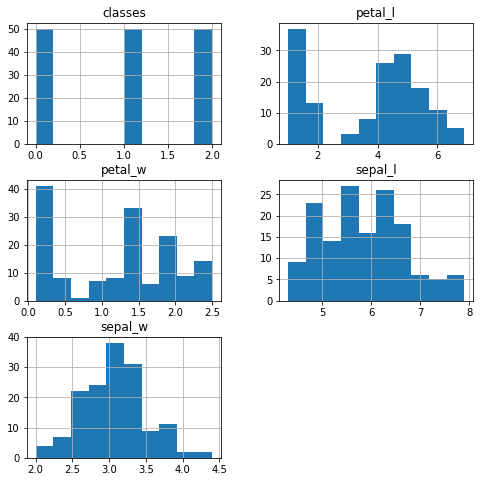

In [50]:
import matplotlib.pyplot as plt
data_iris.hist(figsize=(8,8))
plt.show()

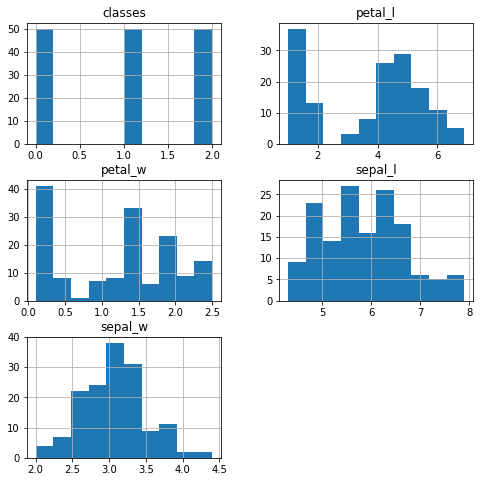

In [51]:
import matplotlib.pyplot as plt
data_iris.hist(figsize=(8,8))
plt.show()

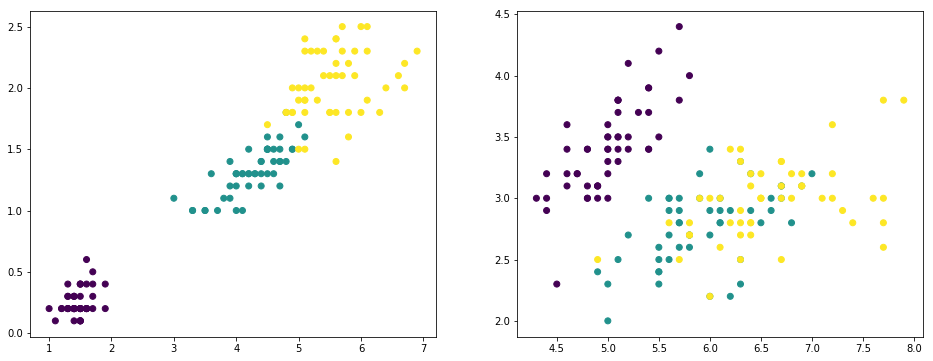

In [52]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.scatter(x=data_iris['petal_l'], y=data_iris['petal_w'],c=data_iris['classes'])
plt.subplot(122)
plt.scatter(x=data_iris['sepal_l'], y=data_iris['sepal_w'],c=data_iris['classes'])
plt.show()

In [53]:
X = data_iris.iloc[:,:-1]
y = data_iris.iloc[:,-1]

In [54]:
from sklearn.model_selection import train_test_split
X_tr,X_ts,y_tr,y_ts = train_test_split(X,y,test_size=0.2)
X_tr.shape,X_ts.shape

((120, 4), (30, 4))

In [55]:
from sklearn.linear_model import LogisticRegression
model_ovr = LogisticRegression(multi_class = 'ovr',solver = 'liblinear',max_iter = 3000)
model_ovr.fit(X_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3000, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
model_sm = LogisticRegression(random_state=0, multi_class='multinomial',solver='lbfgs',max_iter = 3000)
model_sm.fit(X_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=3000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
y_ovr_pred = model_ovr.predict(X_ts)
y_sm_pred = model_sm.predict(X_ts)

In [58]:
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_ts,y_ovr_pred)

array([[ 9,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 11]])

In [59]:
confusion_matrix(y_ts,y_sm_pred)

array([[ 9,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 10]])

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_ts,y_ovr_pred))
print('*'*60)
print(classification_report(y_ts,y_sm_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      0.80      0.89        10
         2.0       0.85      1.00      0.92        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.93      0.94        30
weighted avg       0.94      0.93      0.93        30

************************************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       0.90      0.90      0.90        10
         2.0       0.91      0.91      0.91        11

   micro avg       0.93      0.93      0.93        30
   macro avg       0.94      0.94      0.94        30
weighted avg       0.93      0.93      0.93        30



In [61]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_ovr, X, y, cv=10, scoring='accuracy')

In [62]:
scores.mean()

0.9533333333333334

In [63]:
scores = cross_val_score(model_sm, X, y, cv = 10, scoring = 'accuracy')
scores.mean()

0.9733333333333334